# <center>Data Analysis Presented by:</center> 

<div>
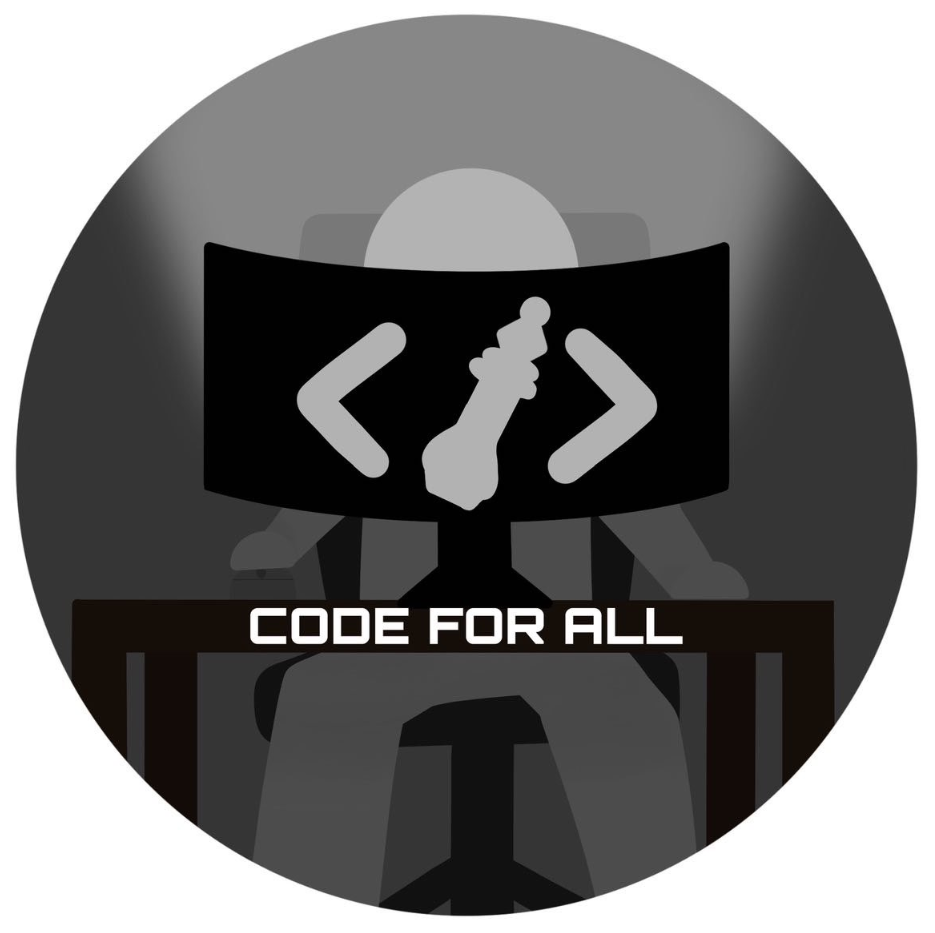
</div>

# Average GPA for the entire subject of CSCI in Fall 2022: 2.5, which is a C+ 

# IMPORTANT FUNCTIONS CREATED IN THIS NOTEBOOK: 

* **gpa_letter_converter()**, which takes in a gpa and converts it into a letter grade
* **calculate_average_gpas()**, which automates the process of going through every class number and every professor for every class number 
* **calculate_teacher_gpas()**, which automates the process of going through every teacher in a subject irrespective of class number, getting their gpa, and comparing it to the average gpa for the entire subject

### <center>Note: These will be used for doing the rest of the analysis of subjects by class!</center>

# SCROLL DOWN FOR WRITTEN NON-TECHNICAL ANALYSIS 

## Also, check this website out to get some basics on formating text with Jupyter notebook!
* https://www.earthdatascience.org/courses/intro-to-earth-data-science/file-formats/use-text-files/format-text-with-markdown-jupyter-notebook/ 

In [3]:
import pandas as pd
import numpy as np
url = "https://docs.google.com/spreadsheets/d/1mS6khEB6m8cPNenNvY9Tg6bJ6YkmcvCI/export?format=csv&gid=1283335856"
df = pd.read_csv(url)
df.head()

,TERM,SUBJECT,NBR,COURSE NAME,SECTION,PROF,TOTAL,A+,A,A-,...,C,C-,D,F,W,INC/NA,AVG GPA,join the best club on campus,Unnamed: 22,https://discord.gg/vxCqd4hdak
0,F2022,ACCT,100,Fin & Mgr Acct,1,"HO, V",28,0,11,2,...,3,0,0,0,5,0,3.383,NaN,NaN,NaN
1,F2022,ACCT,101,Intro Thry & Prac of Acct I,11,"CHAN, J",29,0,13,2,...,0,1,0,0,3,0,3.464,NaN,NaN,NaN
2,F2022,ACCT,101,Intro Thry & Prac of Acct I,5,"RUTHIZER, S",50,2,9,14,...,1,0,3,2,3,0,3.176,NaN,NaN,NaN
3,F2022,ACCT,101,Intro Thry & Prac of Acct I,2,"GRUZA, M",45,1,2,3,...,0,0,0,0,25,0,3.067,NaN,NaN,NaN
4,F2022,ACCT,101,Intro Thry & Prac of Acct I,4,"FEISULLIN, A",45,4,6,1,...,9,1,1,0,4,1,2.908,NaN,NaN,NaN


#### The <u>isinstance()</u>  function returns True if the specified object is of the specified type, otherwise False (https://stackoverflow.com/questions/1549801/what-are-the-differences-between-type-and-isinstance)

In [4]:
important_columns = ["SUBJECT", "NBR", "COURSE NAME", "PROF", "TOTAL", "A+", "A", "A-", "B+", "B", "B-", "C+", "C", "C-", "D", "F", "W", "AVG GPA"]

def gpa_letter_converter(gpa):
    letter_grades = {
        "A": 4.0, 
        "A-": (3.7, 3.8, 3.9), 
        "B+": (3.3, 3.4, 3.5, 3.6), 
        "B": (3.0, 3.1, 3.2), 
        "B-": (2.7, 2.8, 2.9), 
        "C+": (2.3, 2.4, 2.5, 2.6),
        "C": (2.0, 2.1, 2.2), 
        "C-": (1.7, 1.8, 1.9),
        "D": (1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6),
        "F": (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)
    }
    for letter_grade, number_grade in letter_grades.items():
        if isinstance(number_grade, float) and gpa == number_grade:
            return letter_grade
        elif isinstance(number_grade, tuple) and gpa in number_grade:
            return letter_grade
    
    return None

analysis_df = df[important_columns]
analysis_df.head()

,SUBJECT,NBR,COURSE NAME,PROF,TOTAL,A+,A,A-,B+,B,B-,C+,C,C-,D,F,W,AVG GPA
0,ACCT,100,Fin & Mgr Acct,"HO, V",28,0,11,2,1,3,3,0,3,0,0,0,5,3.383
1,ACCT,101,Intro Thry & Prac of Acct I,"CHAN, J",29,0,13,2,0,4,5,0,0,1,0,0,3,3.464
2,ACCT,101,Intro Thry & Prac of Acct I,"RUTHIZER, S",50,2,9,14,6,4,5,0,1,0,3,2,3,3.176
3,ACCT,101,Intro Thry & Prac of Acct I,"GRUZA, M",45,1,2,3,1,5,0,6,0,0,0,0,25,3.067
4,ACCT,101,Intro Thry & Prac of Acct I,"FEISULLIN, A",45,4,6,1,7,5,0,6,9,1,1,0,4,2.908


#### dropna(): 
* Remove missing values (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [5]:
analysis_df = analysis_df.dropna(subset = "PROF")
analysis_df = analysis_df[analysis_df["AVG GPA"] != 0]
analysis_df.shape

(2333, 18)

#### <u>pd.set_option</u> :
* Sets the value of the specified option (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html)

#### <u>pd.reset_option</u>
* Reset one or more options to their default value (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.reset_option.html)

In [6]:
cs_df = analysis_df[analysis_df["SUBJECT"] == "CSCI"]
pd.set_option('display.max_rows', None)
cs_df

,SUBJECT,NBR,COURSE NAME,PROF,TOTAL,A+,A,A-,B+,B,B-,C+,C,C-,D,F,W,AVG GPA
582,CSCI,12,Intro Computers & Computation,"WAXMAN, J",58,0,2,7,5,14,6,2,2,1,3,5,10,2.594
585,CSCI,48,Spreadsheet Programming,"FRIED, M",131,19,10,23,28,17,12,4,1,0,1,1,12,3.354
586,CSCI,48,Spreadsheet Programming,"JAGDEO, M",94,7,14,15,9,11,6,1,1,0,7,7,14,2.945
596,CSCI,100,Information and Intelligence,"CASTRO, R",40,0,8,4,5,5,3,0,4,2,0,3,6,2.876
597,CSCI,111,Intro Algorithmic Problem Solv,"SCHLEY, R",236,10,30,14,8,22,8,17,25,8,13,22,49,2.494
598,CSCI,111,Intro Algorithmic Problem Solv,"CHYN, X",239,0,19,10,8,39,14,11,8,0,23,26,75,2.269
599,CSCI,111,Intro Algorithmic Problem Solv,"CHYN, X",240,0,21,11,7,28,22,7,13,0,23,26,68,2.255
619,CSCI,112,Intro Algori Prob Solving Java,"CONNOR, T",13,6,2,1,1,1,1,0,0,0,0,0,1,3.725
621,CSCI,211,Object-Oriented Program in C++,"WAXMAN, J",150,9,9,7,7,10,10,4,16,0,15,30,32,2.002
622,CSCI,211,Object-Oriented Program in C++,"WAXMAN, J",105,5,5,4,3,4,11,2,9,0,15,25,22,1.735


#### In pandas, both <u>unique</u> and <u>nunique</u> are used to get unique values of a series object, but they serve different purposes and return different types of output:

* **unique()**: This function returns an array of all unique values in the order that they appear in the original DataFrame or Series. It's useful when you want to see or use the actual unique values (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html) 

* **nunique()**: This function returns an integer that represents the number of unique values. It's useful when you just want to know how many unique values exist, rather than what those unique values are (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html) 

#### iloc[]: 
* Purely integer-location based indexing for selection by position (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html)

#### sort_values(): 
* Sort by values along either axis (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [12]:
def calculate_average_gpas(df):
    # Prepare a list to store the results
    results = []

    # Loop over all unique course numbers
    for class_nbr in df["NBR"].unique():
        # Filter the DataFrame for the current course number
        df_nbr = df[df["NBR"] == class_nbr]

        # Loop over all unique professors for the current course number
        for prof in df_nbr["PROF"].unique():
            # Filter the DataFrame for the current professor
            df_prof = df_nbr[df_nbr["PROF"] == prof]

            # Calculate the average GPA for the current professor and course number
            avg_gpa_prof = round(df_prof["AVG GPA"].mean(), 1)

            # Append the result to the list
            results.append({
                "CLASS NUMBER": class_nbr,
                "PROF": prof,
                "AVG GPA PROF": avg_gpa_prof,
                "AVG GPA PROF LETTER": gpa_letter_converter(avg_gpa_prof)
            })

        # If there is more than one professor for this course, calculate the average GPA for the current course number, regardless of the professor
        if df_nbr["PROF"].nunique() > 1:
            avg_gpa_nbr = round(df_nbr["AVG GPA"].mean(), 1)

            # Append the result to the list
            results.append({
                "CLASS NUMBER": class_nbr,
                "PROF": "All Professors",
                "AVG GPA PROF": avg_gpa_nbr,
                "AVG GPA PROF LETTER": gpa_letter_converter(avg_gpa_nbr)
            })

    # Convert the list of results to a DataFrame
    df_results = pd.DataFrame(results)
    
    # Find the hardest class based on average GPA
    hardest_class = df_results[df_results["PROF"] == "All Professors"].sort_values("AVG GPA PROF").iloc[0]

    # Calculate the average GPA for the entire subject
    avg_gpa_subject = round(df["AVG GPA"].mean(), 1)

    print(f"Average GPA for this entire subject in Fall 2022 is: {avg_gpa_subject}, which is a {gpa_letter_converter(avg_gpa_subject)}")
    print(f"The hardest class based on average GPA in Fall 2022 is class number: {hardest_class['CLASS NUMBER']} with an average GPA of {hardest_class['AVG GPA PROF']}, which is a {hardest_class['AVG GPA PROF LETTER']}")

    return df_results

cs_df_results = calculate_average_gpas(cs_df)
cs_df_results

Average GPA for this entire subject in Fall 2022 is: 2.5, which is a C+
The hardest class based on average GPA in Fall 2022 is class number: 211 with an average GPA of 1.7, which is a C-


,CLASS NUMBER,PROF,AVG GPA PROF,AVG GPA PROF LETTER
0,12,"WAXMAN, J",2.6,C+
1,48,"FRIED, M",3.4,B+
2,48,"JAGDEO, M",2.9,B-
3,48,All Professors,3.1,B
4,100,"CASTRO, R",2.9,B-
5,111,"SCHLEY, R",2.5,C+
6,111,"CHYN, X",2.3,C+
7,111,All Professors,2.3,C+
8,112,"CONNOR, T",3.7,A-
9,211,"WAXMAN, J",1.9,C-


In [13]:
def calculate_teacher_gpas(df):
    # Prepare a list to store the results
    results = []

    # Loop over all unique professors
    for prof in sorted(df["PROF"].unique()):
        # Filter the DataFrame for the current professor
        df_prof = df[df["PROF"] == prof]

        # Calculate the average GPA for the current professor
        avg_gpa_prof = round(df_prof["AVG GPA"].mean(), 1)

        # Calculate the percentage of students who withdrew for the current professor
        withdraw_percentage = df_prof["W"].sum() / df_prof["TOTAL"].sum()

        # Append the result to the list
        results.append({
            "PROF": prof,
            "AVG GPA PROF": avg_gpa_prof,
            "AVG GPA PROF LETTER": gpa_letter_converter(avg_gpa_prof),
            "NUM OF CLASSES": len(df_prof),
            "WITHDRAW PERCENTAGE": round(withdraw_percentage * 100, 1)
        })

    # Convert the list of results to a DataFrame
    df_results = pd.DataFrame(results)

    # Calculate the average GPA for the entire subject
    avg_gpa_subject = round(df["AVG GPA"].mean(), 1)
    
    # Calculate the average withdrawal percentage for the entire subject
    withdraw_percentage_subject = round((df["W"].sum() / df["TOTAL"].sum()) * 100, 2)
    
    # Find the professors who teach more than one class, have a GPA that is the same or higher than the subject average GPA,
    # and for whom less than 40% of students withdrew
    best_profs = df_results[(df_results["NUM OF CLASSES"] > 1) & (df_results["AVG GPA PROF"] >= avg_gpa_subject) & (df_results["WITHDRAW PERCENTAGE"] <= withdraw_percentage_subject)]

    print(f"Professors who teach more than one class, have a GPA that is the same or higher than the subject average GPA ({avg_gpa_subject}), and have a withdrawal percentage that is less or equal than the subject average withdrawal percentage ({withdraw_percentage_subject}%):\n")
    print(best_profs, "\n")
    print("Note: This ignores rate my professor ratings. This is soley based on GPA and it doesn't consider how much students actually learn from these teachers!")

    return df_results

teacher_cs_df_results = calculate_teacher_gpas(cs_df)
teacher_cs_df_results

Professors who teach more than one class, have a GPA that is the same or higher than the subject average GPA (2.5), and have a withdrawal percentage that is less or equal than the subject average withdrawal percentage (22.26%):

            PROF  AVG GPA PROF AVG GPA PROF LETTER  NUM OF CLASSES  \
9       FRIED, M           3.3                  B+               2   
10   GOLDBERG, R           3.0                   B               3   
12  GREENBERG, A           3.1                   B               3   
16  KAHROBAEI, D           3.1                   B               2   
23     RAHMAN, M           3.0                   B               2   
28  STEINBERG, O           2.6                  C+               4   
32        TAO, X           3.0                   B               4   
37        YEH, J           2.8                  B-               3   

    WITHDRAW PERCENTAGE  
9                   8.0  
10                 14.3  
12                  6.4  
16                  9.9  
23        

,PROF,AVG GPA PROF,AVG GPA PROF LETTER,NUM OF CLASSES,WITHDRAW PERCENTAGE
0,"ABREU, A",2.2,C,2,9.4
1,"ALAYEV, Y",1.4,D,1,68.8
2,"BOKLAN, K",1.8,C-,2,75.4
3,"BROWN, T",2.1,C,2,8.8
4,"CASTRO, R",2.9,B-,1,15.0
5,"CESARETTI, P",2.1,C,1,23.3
6,"CHYN, X",2.3,C+,4,26.1
7,"CONNOR, T",3.7,A-,1,7.7
8,"FLUTURE, S",2.5,C+,5,43.1
9,"FRIED, M",3.3,B+,2,8.0


# <u>Teacher Analysis</u> 
#### Most of the teachers above make sense based off their Rate My Professor:
* Michael Fried (https://www.ratemyprofessors.com/professor/2072193)
* Aryeh Greenberg (https://www.ratemyprofessors.com/professor/2107674)
* Delaram Kahrobaei (https://www.ratemyprofessors.com/professor/2870283)
* Oren Steinberg (https://www.ratemyprofessors.com/professor/2698138)
* Xiaopeng Tao (https://www.ratemyprofessors.com/professor/2806515) 
* Jackson Yeh (https://www.ratemyprofessors.com/professor/1082596) 

#### Other's don't: 
* Robert Goldberg (https://www.ratemyprofessors.com/professor/446485)
* Md Mahbubur Rahman (https://www.ratemyprofessors.com/professor/2649371) - Lowest withdrawal rate too!

#### Teachers that missed the mark because of gpa, withdrawal rate, and/or only teaching one class, but they have a rate my professor of 4 and above:
* Rebecca Schley (https://www.ratemyprofessors.com/professor/2476011)
* Renne Castro (https://www.ratemyprofessors.com/professor/2368930)
* Xinying Chyn (https://www.ratemyprofessors.com/professor/2715711)
* Vivek Upadhyay (https://www.ratemyprofessors.com/professor/1116392)
* Daniel Leavitt (https://www.ratemyprofessors.com/professor/855541)
* Raymond Law (https://www.ratemyprofessors.com/professor/1234082) - making exception as it sits currently at 3.9
* Robert Roday (https://www.ratemyprofessors.com/professor/2722177) 


***

# <u>Class Description/Analysis</u>

## <i>The hardest class based on average GPA is class number: 211 with an average GPA of 1.7, which is a C-</i>

**<u>CSCI 12 (Intro Computers and Computation)</u>** - Concepts of thinking computationally and the technical tools to function effectively in the digitally-connected world. Hands-on introduction to computers, computation, the Internet, and the basics of computer hardware and software. Students will have experience during the instructed computer lab with a number of software environments including an operating system, a word processor, a presentation tool, a spreadsheet, and a database system. The course will focus on problem solving and programming within the context of a wide range of applications, and prepare students for further study in a variety of majors and minors. In addition, students will acquire the skills needed to learn other similar tools on their own. Two and one-half years of high school mathematics is required 

#### <u>Professor</u>: 
* Jerry Waxman, AVG GPA: 2.6 (https://www.ratemyprofessors.com/professor/287312) which is a **C+** 

***

**<u>CSCI 48 (Spreadsheet Programming)</u>** - In-depth introduction to spreadsheets as a tool for organizing, processing, and analyzing numerical information in such areas as business, finance, engineering, natural and social sciences. Topics include basic cell operations, text manipulation, formulas, functions, arrays, circular references, charting techniques, pivot tables, conditional formatting, and VBA programming 

#### Professors: 
* Matthew Fried, AVG GPA: 3.4 (https://www.ratemyprofessors.com/professor/1822595)
* Mellisa Jagdeo, AVG GPA: 2.9 (https://www.ratemyprofessors.com/professor/2514439)

**<i>General Average GPA for CSCI 48**</i>: 
* **3.1** which is a **B**

***

**<u>CSCI 100 (Information and Intelligence)</u>** - How information measurement, encoding, and transmission relate to the design of artificial intelligence agents such as search engines, robots, and programs that mimic human intelligence. Models of human and artificial intelligence; relations among information, meaning, and data; diagnostic and causal reasoning in the presence of uncertainty. Readings from the literature of information theory and artificial intelligence; writing assignments, completion of a project to design and/or construct an information-driven intelligent agent 

**<u>Professor</u>**: 
* Renne Castro, AVG GPA: 2.9 (https://www.ratemyprofessors.com/professor/2368930) which is a **B-**

***

**<u>CSCI 111 (Intro to Algorithmic Problem Solving in C++)</u>** - Introduction to the principles of algorithmic analysis and computational implementation. Topics include implementation methodologies, including choice and use of data types, objects, classes, and methods; control structures; basic data structures including arrays; procedures and functions; parameters and arguments; scope and lifetime of variables; input and output; Written documentation describing algorithms and identification and correction of algorithmic implementations 

**<u>Professors</u>**: 
* Rebecca Schley (GOAT), AVG GPA: 2.5 (https://www.ratemyprofessors.com/professor/2476011) 
* Xinying Chyn, AVG GPA: 2.3 (https://www.ratemyprofessors.com/professor/2715711)

**<i>General Average GPA for CSCI 111</i>**:  
* **2.3** which is a **C+**

***

**<u>CSCI 112 (Intro Algorithmic Problem Solving Java)</u>** - Introduction to the principles and practice of programming. Topics include primitive data types; concepts of object, class, and method; control structures; arrays procedures and functions; parameter passing; scope and lifetime of variables; input and output; documentation. 

**<u>Professor</u>**: 
* Timothy Connor, AVG GPA: 3.7 (https://www.ratemyprofessors.com/professor/2455397) which is a **A**

***

**<u>CSCI 211 (OOP in C++)</u>** - Objective-oriented algorithmic problem solving in C++, with attention to general as well as language-specific issues including pointer and pointer arithmetic; linked lists; memory management; recursion; operator overloading; inheritance and polymorphism; stream and file I/O; exception handling; templates and STL; applications of simple data structures; testing and debugging techniques 

**<u>Professors</u>**: 
* Jerry Waxman, AVG GPA: 1.9 (https://www.ratemyprofessors.com/professor/287312) 
* Yosef Alayev, AVG GPA: 1.4, and most people dropped the class (https://www.ratemyprofessors.com/professor/424054) 

**<i>General Average GPA for CSCI 211</i>**:  
* **1.7** which is a **C-**

***

**<u>CSCI 212 (OOP in Java)</u>** - Object-oriented algorithmic problem solving in Java, with attention to general as well as language-specific issues including applications, event-driven programming; elements of graphical user interfaces (GUIs); linked lists, recursion, inheritance and polymorphism; file I/O; exception handling; packages; applications of simple data structures; applets; concept of multi-threading; testing and debugging

**<u>Professors</u>**: 
* Kenneth Lord, AVG GPA: 2.2 (https://www.ratemyprofessors.com/professor/100358) 
* Chi Tse, AVG GPA: 2.7, but way less people then in Lord's classes (https://www.ratemyprofessors.com/professor/2012830)

**<i>General Average GPA for CSCI 212</i>**: 
* **2.3** which is a **C+**

***

**<u>CSCI 220 (Discrete Structures)</u>** - Algorithms, recursion, recurrences, asymptotics, relations, graphs and trees, applications 

**<u>Professors</u>**: 
* Delaram Kahrobaei, AVG GPA: 3.1 (https://www.ratemyprofessors.com/professor/2870283)
* Xinying Chyn, AVG GPA: 2.3 (https://www.ratemyprofessors.com/professor/2715711)
* Paul Cesaretti, AVG GPA: 2.1 (https://www.ratemyprofessors.com/professor/2354095) 

**<i>General Average GPA for CSCI 220</i>**: 
* **2.6** which is a **C+**

***

**<u>CSCI 240 (Computer Organization and Assembly Language)</u>** - Principles of computer design and implementation. Instruction set architecture and register-transfer level execution; storage formats; binary data encoding; bus structures; assembly language programming

**<u>Professors</u>**: 
* Jackson Yeh, AVG GPA: 2.8 (https://www.ratemyprofessors.com/professor/1082596)
* Joseph Svitak, AVG GPA: 2.3 (https://www.ratemyprofessors.com/professor/348234) 
 
**<i>General Average GPA for CSCI 240</i>**:  
* **2.5** which is a **C+**

***

**<u>CSCI 313 (Data Structures)</u>** - Fundamentals data structures and their implementations: stacks, queues, trees (binary and AVL), heaps, graphs, hash tables. Searching and sorting algorithms. Runtime analysis. Examples of problem-solving using greedy-algorithm, divide-and-conquer, and backtracking

**<u>Professors</u>**: 
* Xiaopeng Tao, AVG GPA: 2.9 (https://www.ratemyprofessors.com/professor/2806515)
* Chialing Tsai, AVG GPA: 2.4, but more then half a class of 10 withdrew (https://www.ratemyprofessors.com/professor/2576989)
* Oren Steinberg, AVG GPA: 2.2 (https://www.ratemyprofessors.com/professor/2698138)
* Anne Smith Thompson, AVG GPA: 2.1 (https://www.ratemyprofessors.com/professor/352320) 

**<i>General Average GPA for CSCI 313</i>**:  
* **2.4** which is a **C+**

***

**<u>CSCI 316 (Principles of Programming Languages)</u>** - Principles and implementation of programming languages. Topics include: the procedural, object-oriented, functional, and logic programming paradigms, syntax (BNF, expression grammars, operator precedence and associativity), variables (scope, storage bindings, and lifetime), data types, control structures, function call and return (activation records and parameter passing), formal semantics. Programming assignments 

**<u>Professors</u>**: 
* Anne Smith-Thompson, AVG GPA: 2.8 (https://www.ratemyprofessors.com/professor/352320)
* Tat Yung Kong, AVG GPA: 2.1 (https://www.ratemyprofessors.com/professor/1789322)
* Joseph Svitak, AVG GPA: 1.7 (https://www.ratemyprofessors.com/professor/348234)

**<i>General Average GPA for CSCI 316</i>**: 
* **2.1** which is a **C**

***

**<u>CSCI 320 (Theory of Computation)</u>** - Finite state machines, regular languages, regular expressions, grammars, context-free languages, pushdown automata, Turing machines, recursive sets, recursively enumerable sets, reductions, Halting problem, diagonalization 

**<u>Professors</u>**: 
* Bojana Obrenic, AVG GPA: 2.2 (https://www.ratemyprofessors.com/professor/249702)
* Kent Boklan, AVG GPA: 1.8 (https://www.ratemyprofessors.com/professor/629756)

**<i>General Average GPA for CSCI 320</i>**: 
* **2.0** which is a **C**

***

**<u>CSCI 323 (Design and Analysis Algorithms)</u>** - Advanced data structures B-trees, graphs, hash-tables. Problem-solving strategies including divide-and-conquer, backtracking, dynamic programming, and greedy algorithms. Advanced graph algorithms. Time complexity analysis. NP-complete problems. Applications to sorting, searching, strings, graphs. Programming projects) 

**<u>Professors</u>**: 
* Xiaopeng Tao, AVG GPA: 3.6 (https://www.ratemyprofessors.com/professor/2806515)
* Tsaiyun Phillips, AVG GPA: 2.6 (https://www.ratemyprofessors.com/professor/1870716)
* Theodore Brown, AVG GPA: 2.2 (https://www.ratemyprofessors.com/professor/1941086)
* Mayank Goswami (https://www.ratemyprofessors.com/professor/2195317) 

**<i>General Average GPA for CSCI 323</i>**: 
* **2.6** which is a **C+**

***

**<u>CSCI 331 (Database Systems)</u>** - ER modeling; functional dependencies and relational design; file organization and indexing; relational algebra and calculi as query languages; SQL; transactions, concurrency and recovery; query processing. Programming projects 

**<u>Professors</u>**: 
* Oren Steinberg, AVG GPA: 2.9 (https://www.ratemyprofessors.com/professor/2698138)
* Peter Heller, AVG GPA: 2.4 (https://www.ratemyprofessors.com/professor/2230400)
* Daniel Leavitt, AVG GPA: 2.3 (https://www.ratemyprofessors.com/professor/855541)
* Bojana Obrenic, AVG GPA: 2 (https://www.ratemyprofessors.com/professor/249702) 

**<i>General Average GPA for CSCI 331</i>**: 
* **2.5** which is a **C+**

**<u>CSCI 334 (Data Mining and Warehousing)</u>** - Data Mining and data warehousing: data warehouse basics; concept of patterns and visualization; information theory, information and statistics linkage; temporal-spatial data; change point detection; statistical association patterns; pattern inference and model discovery; Bayesian networks; pattern ordering inference; selected case study 

**<u>Professor</u>**: 
* Bon Sy, AVG GPA: 3.1, however, half the class withdrew (https://www.ratemyprofessors.com/professor/217852) which is a **B**

***

**<u>CSCI 335 (Information Organization and Retrieval)</u>** - Concepts of information retrieval: keywords and Boolean retrieval; text processing, automatic indexing, term weighting, similarity measures; retrieval models: vector model, probabilistic model; extended Boolean systems: fuzzy set, p-norm models; linguistic model; extensions and AI techniques: learning and relevance feedback; term dependence; document and term clustering;network approaches; linguistic analysis and knowledge representation. Implementation: inverted files; efficiency issues for large-scale systems; integrating database and information retrieval

**<u>Professor</u>**: 
* Robert Goldberg, AVG GPA: 2.9 (https://www.ratemyprofessors.com/professor/446485) which is a **B-**

***

**<u>CSCI 340 (Operating Systems Principles)</u>** - Principles of the design and implementation of operating systems. Concurrency, multithreading, synchronization, CPU scheduling, interrupt handling, deadlocks, memory management, secondary storage management, file systems. Programming projects to illustrate portions of an operating system

**<u>Professors</u>**: 
* John Svadlenka, AVG GPA: 2.7 (https://www.ratemyprofessors.com/professor/2485140)
* Simina Fluture, AVG GPA: 2.4 (https://www.ratemyprofessors.com/professor/513427)

**<i>General Average GPA for CSCI 340</i>**: 
* **2.6** which is a **C+**

***

**<u>CSCI 343 (Computer Architecture)</u>** - Instruction set architectures, including RISC, CISC, stack, and VLIW architectures. The memory hierarchy, including cache design and performance issues, shared memory organizations, and bus structures. Models of parallel computing, including multiprocessors, multicomputers, multivector, SIMD, PRAM, and MIMD architectures. Pipelining models, including clocking and timing, instruction pipeline design, arithmetic pipeline design, and superscalar pipelining

**<u>Professors</u>**: 
* Md Mahbubur Rahman, AVG GPA: 3 (https://www.ratemyprofessors.com/professor/2649371)
* Simina Fluture, AVG GPA: 2.7 (https://www.ratemyprofessors.com/professor/513427)
* Anne Smith-Thompson, AVG GPA: 2.4 (https://www.ratemyprofessors.com/professor/352320)
* Vivek Upadhyay, AVG GPA: 2.0 (https://www.ratemyprofessors.com/professor/1116392) 

**<i>General Average GPA for CSCI 343</i>**: 
* **2.5** which is a **C+**

***

**<u>CSCI 344 (Distributed Systems)</u>** - Issues in the implementation of computer systems using multiple processors linked through a communication network. Communication in distributed systems including layered protocols and the client-server model; synchronization of distributed processes and process threads

**<u>Professor</u>**: 
* Simina Fluture, AVG GPA: 2.5, and half the class dropped (https://www.ratemyprofessors.com/professor/513427) which is a **C+**

***

**<u>CSCI 348 (Data Communications)</u>** - Computer communications and networks; carriers, media, interfaces (RS 232, RS 422, CCITT); circuit types, data codes, synchronous and asynchronous transmission; protocols (OSI, TCP/IP); modems, multiplexors, and other network hardware; error correction and encryption; voice and data switching: local area networks, ISDN, packet switching; issues in the architecture, design, and management of networks 

**<u>Professor</u>**: 
* Md Mahbubur Rahman, AVG GPA: 2.9 (https://www.ratemyprofessors.com/professor/2649371) which is a **B-**

***

**<u>CSCI 355 (Internet and Web Technologies)</u>** - Internet protocol stack, analysis of representation protocols; Internet applications: client-server architecture, popular Internet application protocols, Internet application design, client side programming, server side programming, Web application and website design; programming projects 

**<u>Professors</u>**: 
* Matthew Fried, AVG GPA: 3.2 (https://www.ratemyprofessors.com/professor/2072193)
* Raymond Law, AVG GPA: 2.3 (https://www.ratemyprofessors.com/professor/1234082) 

**<i>General Average GPA for CSCI 355</i>**: 
* **2.5** which is a **C+**

***

**<u>CSCI 370 (Software Engineering)</u>** - Principles of software engineering including the software life cycle, reliability, maintenance, requirements and specifications, design, implementation and testing. Oral and written presentations of the software design. Implementation of a large programming project using currently-available software engineering tools

**<u>Professors</u>**: 
* Aryeh Greenberg, AVG GPA: 3.1 (https://www.ratemyprofessors.com/professor/2107674)
* Andy Abreu, AVG GPA: 2.2 (https://www.ratemyprofessors.com/professor/2148908)

**<i>General Average GPA for CSCI 370</i>**: 
* **2.8** which is a **B-**

***

**<u>CSCI 381 (Special Topics in Computer Science)</u>** 

**<u>Professors</u>**: 
* Tsaiyun Phillips, AVG GPA: 3.4 (https://www.ratemyprofessors.com/professor/1870716)
* Peter Heller, AVG GPA: 3.3 (https://www.ratemyprofessors.com/professor/2230400)
* Robert Roday, AVG GPA: 3.3 (https://www.ratemyprofessors.com/professor/2722177)
* Jerry Waxman, AVG GPA: 3.2 (https://www.ratemyprofessors.com/professor/287312)
* Robert Goldberg, AVG GPA: 3.1 (https://www.ratemyprofessors.com/professor/446485)
* Chialing Tsai, AVG GPA: 2.6 (https://www.ratemyprofessors.com/professor/2576989)
* Alla Rozovskaya, AVG GPA: 2.3 (https://www.ratemyprofessors.com/professor/2189504)
* Johnathan Gryak, AVG GPA: 2.2 (https://www.ratemyprofessors.com/professor/2886485)
* Theodore Brown, AVG GPA: 2.1 (https://www.ratemyprofessors.com/professor/1941086)

**<i>General Average GPA for CSCI 381</i>**: 
* **2.8** which is a **B-**